In [120]:
import pandas as pd

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)

In [40]:
#LÊ DADOS E EXCLUI PRIMEIRAS 5 COLUNAS
df = pd.read_csv("data.csv", sep=";")
df = df.iloc[:, 5:]
display(df)

,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO,ENSINO_MEDIO,QUILOMBOLA,DEFICIENTE,TIPO_CONCORRENCIA
0,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,"709,94","635,54",1,S,N,N,AC
1,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,"683,18","635,54",2,S,N,N,AC
2,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,"679,78","635,54",3,N,N,N,AC
3,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,"679,76","635,54",4,N,N,N,AC
4,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,"678,22","635,54",5,N,N,N,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,"658,9","650,68",2,S,N,N,LI_EP
3190,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,"658,28","650,68",3,S,N,N,LI_EP
3191,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,"652,12","650,68",4,S,N,N,LI_EP
3192,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,"651,62","650,68",5,S,N,N,LI_EP


NO_CAMPUS           
Campus Viçosa           2300
Campus Rio Paranaíba     529
Campus Florestal         365
Name: count, dtype: int64

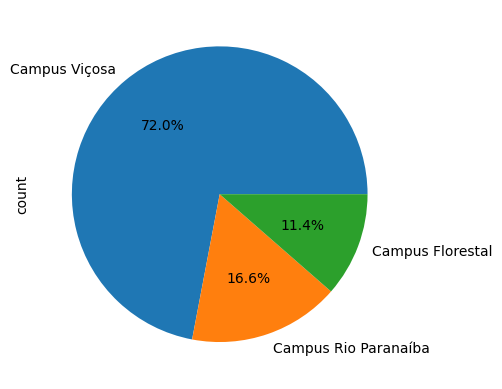

In [66]:
display(df[["NO_CAMPUS"]].value_counts())
df["NO_CAMPUS"].value_counts().plot(kind='pie', autopct='%1.1f%%');

In [45]:
display(df[['NO_CAMPUS', 'NO_CURSO']].groupby('NO_CAMPUS').agg(lambda x : ' - '.join(set(x))).reset_index())

,NO_CAMPUS,NO_CURSO
0,Campus Florestal,CIÊNCIAS BIOLÓGICAS - CIÊNCIA DA COMPUTAÇÃO - ENGENHARIA DE ALIMENTOS - FÍSICA - EDUCAÇÃO FÍSICA - MATEMÁTICA - QUÍMICA - ADMINISTRAÇÃO - GESTÃO AMBIENTAL - AGRONOMIA
1,Campus Rio Paranaíba,CIÊNCIAS CONTÁBEIS - NUTRIÇÃO - CIÊNCIAS BIOLÓGICAS - ENGENHARIA DE PRODUÇÃO - SISTEMAS DE INFORMAÇÃO - ENGENHARIA CIVIL - QUÍMICA - ADMINISTRAÇÃO - AGRONOMIA - CIÊNCIA E TECNOLOGIA DE ALIMENTOS
2,Campus Viçosa,MEDICINA VETERINÁRIA - ENGENHARIA FLORESTAL - SECRETARIADO EXECUTIVO - ENGENHARIA DE ALIMENTOS - COMUNICAÇÃO SOCIAL - JORNALISMO - ENGENHARIA DE AGRIMENSURA E CARTOGRÁFICA - ENGENHARIA QUÍMICA - COOPERATIVISMO - BIOQUÍMICA - NUTRIÇÃO - ABI - QUíMICA - ABI - CIÊNCIAS BIOLÓGICAS - ENFERMAGEM - ABI - CIÊNCIAS SOCIAIS - ABI - GEOGRAFIA - PEDAGOGIA - ENGENHARIA CIVIL - CIÊNCIAS ECONÔMICAS - AGRONOMIA - ABI - HISTÓRIA - CIÊNCIA E TECNOLOGIA DE LATICÍNIOS - CIÊNCIAS CONTÁBEIS - ABI - EDUCAÇÃO FÍSICA - ABI - LETRAS - ABI - MATEMÁTICA - ENGENHARIA ELÉTRICA - DIREITO - ENGENHARIA MECÂNICA - ENGENHARIA AMBIENTAL - AGRONEGÓCIO - ABI - DANÇA - ARQUITETURA E URBANISMO - MEDICINA - CIÊNCIA DA COMPUTAÇÃO - ENGENHARIA DE PRODUÇÃO - SERVIÇO SOCIAL - ZOOTECNIA - EDUCAÇÃO INFANTIL - ABI - FÍSICA/ENGENHARIA FÍSICA - ENGENHARIA AGRÍCOLA E AMBIENTAL - ADMINISTRAÇÃO


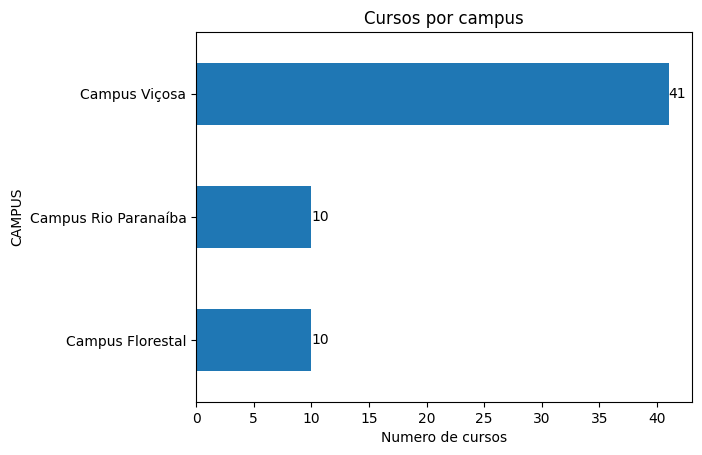

In [112]:
ax = df[['NO_CAMPUS', 'NO_CURSO']].rename(columns={'NO_CAMPUS': 'CAMPUS'}).groupby('CAMPUS').nunique()\
        .plot(kind='barh', xlabel='Numero de cursos', title="Cursos por campus");
ax.get_legend().remove();
ax.bar_label(ax.containers[0]);

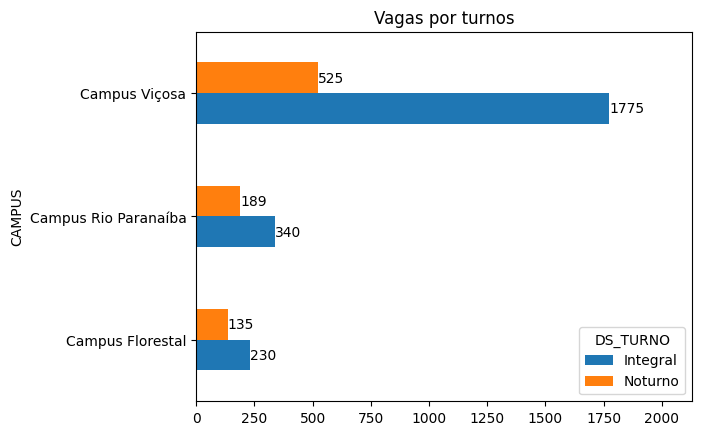

In [115]:
ax = df[['NO_CAMPUS', 'DS_TURNO', 'NU_CLASSIFICACAO']].groupby(['NO_CAMPUS', 'DS_TURNO']).count().unstack()\
.rename(columns={'DS_TURNO': 'Turno'}).droplevel(level=0, axis=1).plot(kind='barh', title="Vagas por turnos")
ax.margins(x=0.2)
ax.set_ylabel("CAMPUS")
for container in ax.containers:
    ax.bar_label(container);